## Fullname: Quách Xuân Nam
## Code: 20020541

# <center>Deeplearning: Homework 7</center>

In [1]:
class Logger():
    def __init__(self):
        self.B = '\033[94m'
        self.Y = '\033[93m'
        self.G = '\033[92m'
        self.R = '\033[91m'
        self.BOLD = '\033[1m'
        self.E = '\033[0m'

    def FAIL(self, msg='ERROR'):
        return self.R + str(msg) + self.E
    
    def OK(self, msg='SUCCESS'):
        return self.G + str(msg) + self.E
    
    def WARN(self, msg='WARNING'):
        return self.Y + str(msg) + self.E
    
    def TEXT(self, msg=''):
        return self.B + f"{msg}" + self.E
    
    def TEXT_BOLD(self, msg=''):
        return self.BOLD + f"{msg}" + self.E
    
    def status(self, title, idx, n):
        pc = round((idx+1)/n*100, 2)
        if int(pc)*1.0 == pc:
            pc = int(pc)
        return '['+self.TEXT(title)+'] ' + self.OK(f'{pc}%') + self.TEXT_BOLD(f'({idx+1}/{n}):')

clr = Logger()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
import pickle
# model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
device= torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(clr.OK(device))

cpu


In [3]:
data_path = 'iris'
column_names = ['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm', 'petal_width_in_cm', 'class']

# Bài 1
<a id = 'b1'></a>
[Bài 1](#b1) - [Bài 2](#b2) - [Bài 3](#b3) - [Bài 4](#b4) - [Bài 5](#b5) - [Bài 6](#b6) - [Bài 7](#b7) - [Bài 8](#b8) - [Bài 9](#b9) - [Bài 10](#b10) - [Bài 11](#b11) - [Bài 12](#b12)

1. Number of Instances: 150 (50 in each of three classes)

2. Number of Attributes: 4 numeric, predictive attributes and the class

3. Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: `Iris Setosa`, `Iris Versicolour`, `Iris Virginica`
   
4. Missing Attribute Values: None

Summary Statistics:
||Min|Max|Mean|SD|Class|Correlation|
|---|---|---|---|---|---|---|
|sepal length|4.3|7.9|5.84|0.83|0.7826||
|sepal width|2.0|4.4|3.05|0.43|-0.4194||
|petal length|1.0|6.9|3.76|1.76|0.9490|High!|
|petal width|0.1|2.5|1.20|0.76|0.9565|High!|

5. Class Distribution: 33.3% for each of 3 classes.

In [4]:
def read_data(name:str = 'iris'):
    '''
    name include: iris, bezdekIris
    '''
    df = pd.read_csv(f'{data_path}/{name}.data', header=None)
    df.columns = column_names
    return df

In [6]:
df = read_data('iris')
print(clr.TEXT('Shape:'), df.shape)
df.head()

Shape: (150, 5)


,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length_in_cm  150 non-null    float64
 1   sepal_width_in_cm   150 non-null    float64
 2   petal_length_in_cm  150 non-null    float64
 3   petal_width_in_cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe().round(2)

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [9]:
df['class'].value_counts().reset_index()

,class,count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


### 1.  Trực quan hóa dữ liệu với các biểu đồ box, histogram và các phân tích thống kê với `4` đặc trưng đầu

In [10]:
features = ['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm', 'petal_width_in_cm']

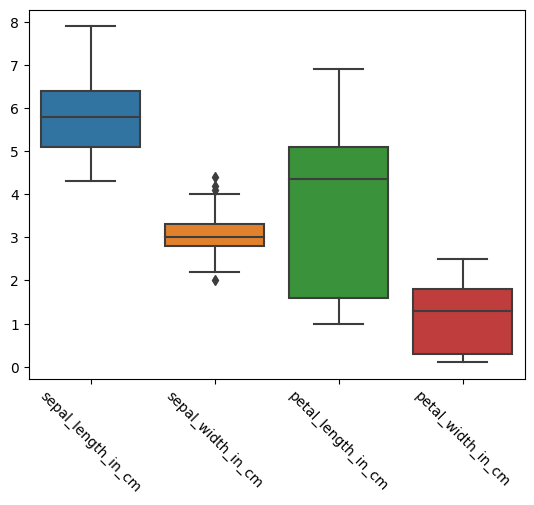

In [11]:
sns.boxplot(data=df);
plt.xticks(rotation=-45);

> `sepal width` có xuất hiện outlier

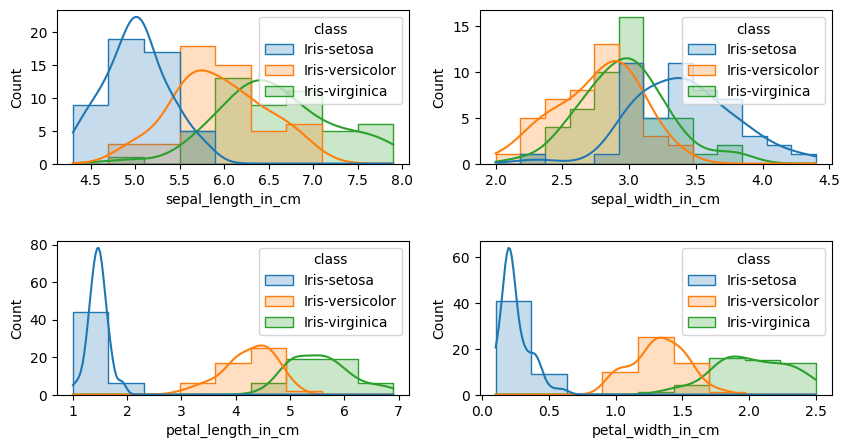

In [12]:
fig = plt.figure(figsize=(10, 5))
for i in range(1, 5):
    axes = fig.add_subplot(2, 2, i)
    sns.histplot(data=df, x=features[i-1], kde = True, hue = "class", element="step")
    if i == 2 or i == 4:  # Thêm khoảng cách dưới mỗi hàng
        plt.subplots_adjust(hspace=0.5)

> Trong `sepal width` phần lớn các giá trị các label trong class tập trung ở 1 khu vực mà không tách rời nên khá khó để biết được loài hoa nào

# Bài 2
<a id = 'b2'></a>
[Bài 1](#b1) - [Bài 2](#b2) - [Bài 3](#b3) - [Bài 4](#b4) - [Bài 5](#b5) - [Bài 6](#b6) - [Bài 7](#b7) - [Bài 8](#b8) - [Bài 9](#b9) - [Bài 10](#b10) - [Bài 11](#b11) - [Bài 12](#b12)

Chuyển đổi các lớp thành số một cách tự động

In [13]:
label_encoder= preprocessing.LabelEncoder()
df['class_endcoder']= label_encoder.fit_transform(df['class'])
df.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class,class_endcoder
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [14]:
for i in range(3):
    print(f'{clr.TEXT(i)}: {label_encoder.inverse_transform([i])}')

0: ['Iris-setosa']
1: ['Iris-versicolor']
2: ['Iris-virginica']


# Bài 3
<a id = 'b3'></a>
[Bài 1](#b1) - [Bài 2](#b2) - [Bài 3](#b3) - [Bài 4](#b4) - [Bài 5](#b5) - [Bài 6](#b6) - [Bài 7](#b7) - [Bài 8](#b8) - [Bài 9](#b9) - [Bài 10](#b10) - [Bài 11](#b11) - [Bài 12](#b12)

Sử dụng $4$ đặc trưng của bộ dữ liệu, chia bộ dữ liệu thành $2$ phần Train/Test với tỉ lệ `7:3`, cho biết trong bộ dữ liệu đã cho có dữ liệu nào `null` không, phân tích bộ dữ liệu theo từng lớp qua các biểu đồ.

In [15]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

X_train = df_train[features]
y_train = df_train['class_endcoder']

X_test = df_test[features]
y_test = df_test['class_endcoder']

print(clr.TEXT('X_train:'), X_train.shape)
print(clr.TEXT('y_train:'), y_train.shape)

X_train: (105, 4)
y_train: (105,)


In [16]:
df_train.isnull().sum()

sepal_length_in_cm    0
sepal_width_in_cm     0
petal_length_in_cm    0
petal_width_in_cm     0
class                 0
class_endcoder        0
dtype: int64

> Data training không có `null`

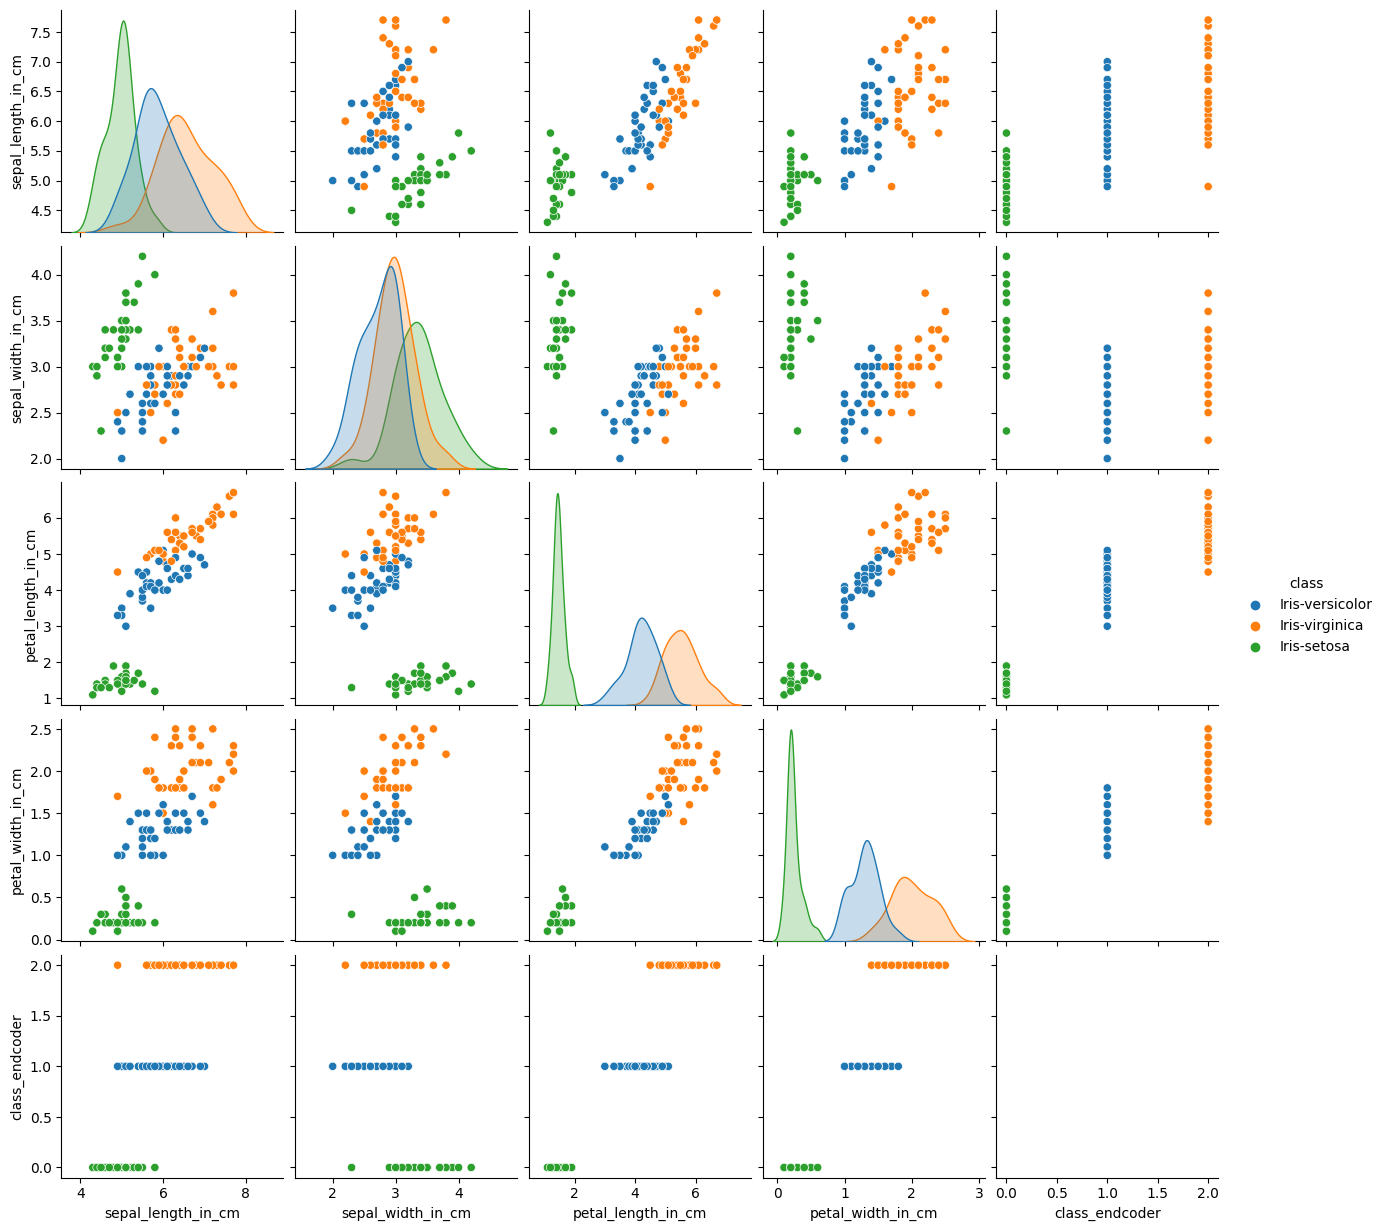

In [17]:
sns.pairplot(df_train, hue='class', height=2.5);

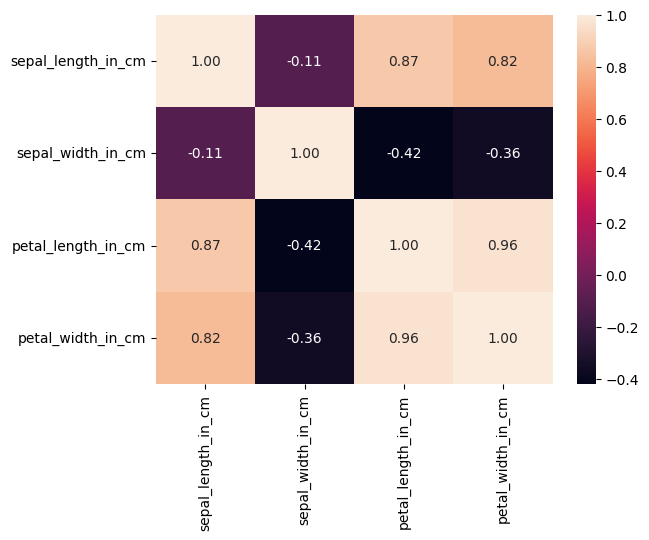

In [18]:
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt=".2f");

In [19]:
new_features = ['sepal_length_in_cm', 'petal_length_in_cm', 'petal_width_in_cm']

# Bài 4
<a id = 'b4'></a>
[Bài 1](#b1) - [Bài 2](#b2) - [Bài 3](#b3) - [Bài 4](#b4) - [Bài 5](#b5) - [Bài 6](#b6) - [Bài 7](#b7) - [Bài 8](#b8) - [Bài 9](#b9) - [Bài 10](#b10) - [Bài 11](#b11) - [Bài 12](#b12)

Đánh giá bộ dữ liệu với giải thuật `KNN` bằng phương pháp `5-Fold` (k-fold)

In [20]:
scores = []
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, df[features], df['class_endcoder'], cv=kf)
    scores.append(np.mean(score))

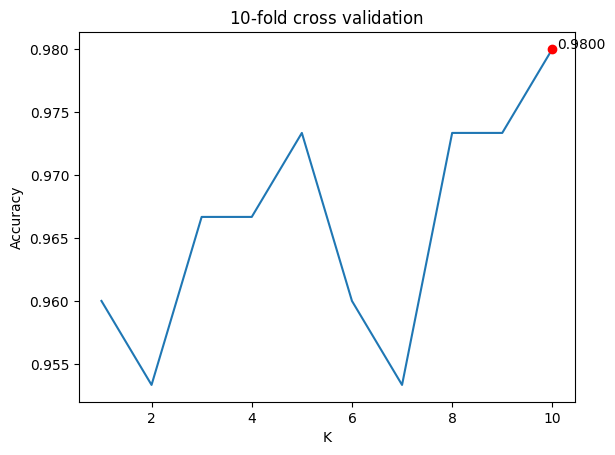

In [21]:
plt.plot(range(1, 11), scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title(r'$10$-fold cross validation')
max_sco = max(scores)
plt.plot(scores.index(max_sco)+1, max_sco, 'ro')
plt.annotate(f'{max_sco:.4f}', xy=(scores.index(max_sco), max_sco), xytext=(scores.index(max_sco)+1.1, max_sco))
plt.show()

# Bài 5
<a id = 'b5'></a>
[Bài 1](#b1) - [Bài 2](#b2) - [Bài 3](#b3) - [Bài 4](#b4) - [Bài 5](#b5) - [Bài 6](#b6) - [Bài 7](#b7) - [Bài 8](#b8) - [Bài 9](#b9) - [Bài 10](#b10) - [Bài 11](#b11) - [Bài 12](#b12)

Huấn luyện dữ liệu cho bài toán phân lớp sử dụng $4$ đặc trưng trên với mô hình học sâu `RNN`, `GRU`, `LSTM`.

In [22]:
class RNN(nn.Module):
    def __init__(self, input_size,hidden_size, output_size):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, hidden = self.rnn(x)
        out = self.fc(out)
        return out

class GRU(nn.Module):
    def __init__(self, input_size,hidden_size, output_size):
        super(GRU, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, hidden = self.gru(x)
        out = self.fc(out)
        return out

class LSTM(nn.Module):
    def __init__(self, input_size,hidden_size, output_size):
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, hidden = self.lstm(x)
        out = self.fc(out)
        return out

class ModelTrainer:
    def __init__(self, model):
        self.model = model.to(device)
        self.losses = []
        self.accuracy = []

    def fit(self, x_train, y_train, epochs = 100, lr = 0.01):
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=lr)
        x_train = torch.tensor(x_train.values, dtype=torch.float32).view(-1, 1, self.model.input_size).to(device)
        y_train = torch.tensor(y_train.values, dtype=torch.long).to(device)
        loop = tqdm(range(epochs))
        for epoch in loop:
            self.optimizer.zero_grad()
            output = self.model(x_train)
            loss = self.criterion(output[:, -1, :], y_train) 
            loss.backward()
            self.optimizer.step()
            loop.set_description(f'Training {clr.TEXT(self.model.__class__.__name__)}')
            loop.set_postfix(loss=loss.item())
            # ---
            self.losses.append(loss.item())
            _, predicted = torch.max(output[:, -1, :], 1)
            self.accuracy.append(accuracy_score(y_train.cpu().numpy(), predicted.cpu().numpy()))


    def predict(self, x_test):
        with torch.no_grad():
            x_test = torch.tensor(x_test.values, dtype=torch.float32).view(-1, 1, self.model.input_size).to(device)
            output = self.model(x_test)
            _, predicted = torch.max(output[:, -1, :], 1)
            return predicted.cpu().numpy()
        
    def evaluate(self, x_test, y_test):
        report = {
            'accuracy': None,
            'precision': None,
            'recall': None,
            'f1-score': None,
            'confusion_matrix': None
        }
        with torch.no_grad():
            x_test = torch.tensor(x_test.values, dtype=torch.float32).view(-1, 1, self.model.input_size).to(device)
            output = self.model(x_test)
            _, predicted = torch.max(output[:, -1, :], 1)
            y_test = y_test.values
            report['accuracy'] = accuracy_score(y_test, predicted.cpu().numpy())
            report['precision'] = precision_score(y_test, predicted.cpu().numpy(), average='macro')
            report['recall'] = recall_score(y_test, predicted.cpu().numpy(), average='macro')
            report['f1-score'] = f1_score(y_test, predicted.cpu().numpy(), average='macro')
            report['confusion_matrix'] = confusion_matrix(y_test, predicted.cpu().numpy())
            return report
        
    def plot (self):
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))
        ax[0].plot(self.losses)
        ax[0].set_title('Loss')
        ax[1].plot(self.accuracy)
        ax[1].set_title('Accuracy')
        plt.show()
        
    def save(self, path):
        torch.save(self.model.state_dict(), path)

    def load(self, path):
        self.model.load_state_dict(torch.load(path))



In [23]:
input_size = X_train.shape[1]
hidden_size = 128
output_size = len(y_train.unique())
epochs = 100
lr = 0.01

rnn = ModelTrainer(RNN(input_size, hidden_size, output_size))
rnn.fit(X_train, y_train, epochs = epochs, lr = lr)
gru = ModelTrainer(GRU(input_size, hidden_size, output_size))
gru.fit(X_train, y_train, epochs = epochs, lr = lr)
lstm = ModelTrainer(LSTM(input_size, hidden_size, output_size))
lstm.fit(X_train, y_train, epochs = epochs, lr = lr)

Training RNN:  11%|█         | 11/100 [00:00<00:00, 106.10it/s, loss=0.209]

Training LSTM: 100%|██████████| 100/100 [00:00<00:00, 120.87it/s, loss=0.0553]


In [24]:
reports = {}
for md in [rnn, gru, lstm]:
    reports[md.model.__class__.__name__] = md.evaluate(X_test, y_test)

df = pd.DataFrame(reports).T
df

,accuracy,precision,recall,f1-score,confusion_matrix
RNN,1.0,1.0,1.0,1.0,"[[19, 0, 0], [0, 13, 0], [0, 0, 13]]"
GRU,1.0,1.0,1.0,1.0,"[[19, 0, 0], [0, 13, 0], [0, 0, 13]]"
LSTM,1.0,1.0,1.0,1.0,"[[19, 0, 0], [0, 13, 0], [0, 0, 13]]"


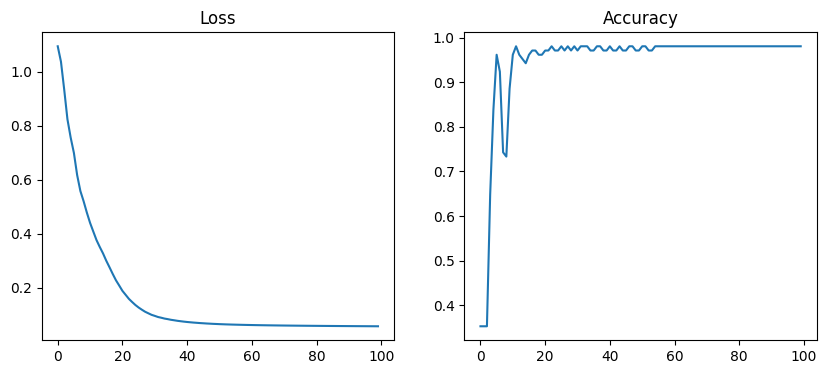

In [25]:
rnn.plot()

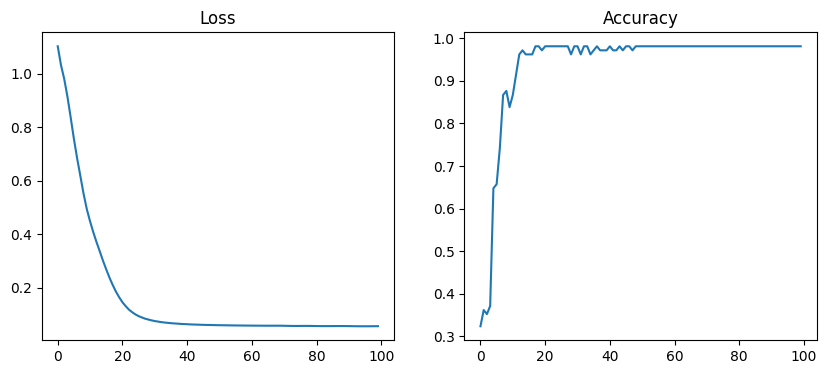

In [26]:
gru.plot()

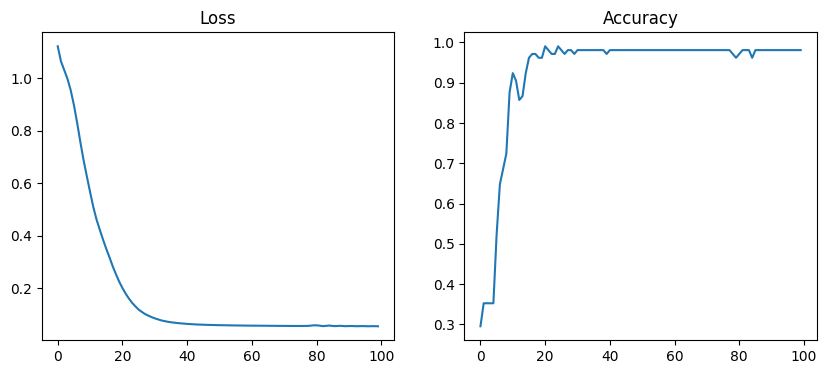

In [27]:
lstm.plot()

# Bài 6
<a id = 'b6'></a>
[Bài 1](#b1) - [Bài 2](#b2) - [Bài 3](#b3) - [Bài 4](#b4) - [Bài 5](#b5) - [Bài 6](#b6) - [Bài 7](#b7) - [Bài 8](#b8) - [Bài 9](#b9) - [Bài 10](#b10) - [Bài 11](#b11) - [Bài 12](#b12)

Tính độ đo `F1 score`.

In [28]:
df['f1-score']

RNN     1.0
GRU     1.0
LSTM    1.0
Name: f1-score, dtype: object

# Bài 7
<a id = 'b7'></a>
[Bài 1](#b1) - [Bài 2](#b2) - [Bài 3](#b3) - [Bài 4](#b4) - [Bài 5](#b5) - [Bài 6](#b6) - [Bài 7](#b7) - [Bài 8](#b8) - [Bài 9](#b9) - [Bài 10](#b10) - [Bài 11](#b11) - [Bài 12](#b12)

Tính độ đo `Accuracy`.

In [29]:
df['accuracy']

RNN     1.0
GRU     1.0
LSTM    1.0
Name: accuracy, dtype: object

# Bài 8
<a id = 'b8'></a>
[Bài 1](#b1) - [Bài 2](#b2) - [Bài 3](#b3) - [Bài 4](#b4) - [Bài 5](#b5) - [Bài 6](#b6) - [Bài 7](#b7) - [Bài 8](#b8) - [Bài 9](#b9) - [Bài 10](#b10) - [Bài 11](#b11) - [Bài 12](#b12)

Tính độ đo `Confusion Matrix`.

In [30]:
for name in df.index:
    print(clr.TEXT(name))
    print(df.loc[name, 'confusion_matrix'])
    print(clr.WARN('*'*20))

RNN
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
********************
GRU
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
********************
LSTM
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
********************


# Bài 9
<a id = 'b9'></a>
[Bài 1](#b1) - [Bài 2](#b2) - [Bài 3](#b3) - [Bài 4](#b4) - [Bài 5](#b5) - [Bài 6](#b6) - [Bài 7](#b7) - [Bài 8](#b8) - [Bài 9](#b9) - [Bài 10](#b10) - [Bài 11](#b11) - [Bài 12](#b12)

So sánh kết quả các độ đo 6,7,8 với các giải thuật học máy ở trên.

> Cả $3$ giải thuật đều cho ra các chỉ số độ đo tuyệt đối do data ít và mô hình khá lớn. Cho thấy các mô hình deeplearning cho ra các kết quả tốt hơn nhiều so với các mô hình máy học trước đó đã làm.

In [31]:
for md in [rnn, gru, lstm]:
    total_params = sum(p.numel() for p in md.model.parameters())
    print(f'Total parameters of {clr.TEXT(md.model.__class__.__name__)}: {total_params}')

print('Shape of input:', X_train.shape)

Total parameters of RNN: 17539
Total parameters of GRU: 51843
Total parameters of LSTM: 68995
Shape of input: (105, 4)


# Bài 10
<a id = 'b10'></a>
[Bài 1](#b1) - [Bài 2](#b2) - [Bài 3](#b3) - [Bài 4](#b4) - [Bài 5](#b5) - [Bài 6](#b6) - [Bài 7](#b7) - [Bài 8](#b8) - [Bài 9](#b9) - [Bài 10](#b10) - [Bài 11](#b11) - [Bài 12](#b12)

Lưu model với giải thuật đạt kết quả tốt nhất

> Ưu tiên `RNN` vì có tham số ít nhất.

In [32]:
rnn.save('best_model.pth')

# Bài 11
<a id = 'b11'></a>
[Bài 1](#b1) - [Bài 2](#b2) - [Bài 3](#b3) - [Bài 4](#b4) - [Bài 5](#b5) - [Bài 6](#b6) - [Bài 7](#b7) - [Bài 8](#b8) - [Bài 9](#b9) - [Bài 10](#b10) - [Bài 11](#b11) - [Bài 12](#b12)

Xây dựng ứng dụng với đầu vào là dữ liệu, có thể tự ngõ hay từ $1$ file, in kết quả ra màn hình

deploy: https://qxnamdlhw7.streamlit.app/

github: https://github.com/QxNam/dl_hw7
